<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [6]:
df = pd.read_csv('/content/LSPI11.csv')

In [7]:
df

,Date,spi1,avgw vs spi1,avgh vs spi1,Lspi1
0,01-05-1979,-1.714817,1.982121,0.680302,-1.714817
1,01-06-1979,-0.889794,1.233030,0.749740,-0.889794
2,01-07-1979,0.889794,1.248285,0.856281,0.889794
3,01-08-1979,-0.364798,1.316450,0.942733,-0.364798
4,01-09-1979,0.143235,1.741138,0.903878,0.143235
...,...,...,...,...,...
412,01-09-2013,-0.606144,1.246757,0.859645,-0.606144
413,01-10-2013,-2.145778,1.015529,0.772777,-2.145778
414,01-11-2013,-2.145778,0.991740,0.609961,-2.145778
415,01-12-2013,0.143235,1.094705,0.526293,0.143235


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          417 non-null    datetime64[ns]
 1   spi1          417 non-null    float64       
 2   avgw vs spi1  417 non-null    float64       
 3   avgh vs spi1  417 non-null    float64       
 4   Lspi1         417 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 16.4 KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd356ab350>,
      dtype=object)

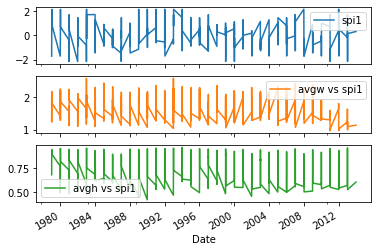

In [168]:
df.set_index('Date')[['spi1', 'avgw vs spi1','avgh vs spi1',  ]].plot(subplots=True)

In [331]:
df_input=df[['spi1','avgh vs spi1']]

In [332]:
df_input.describe()

,spi1,avgh vs spi1
count,417.000000,417.000000
mean,0.000863,0.761723
std,0.972946,0.141210
min,-2.156973,0.420376
25%,-0.694336,0.632047
50%,0.000000,0.776512
75%,0.694336,0.892296
max,2.156973,0.964165


In [333]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [334]:
data_scaled

array([[0.10249454, 0.47799001],
       [0.29374005, 0.60568386],
       [0.70625995, 0.80160707],
       [0.41543745, 0.96058834],
       [0.53320272, 0.88913552],
       [0.79527541, 0.84946076],
       [0.99740498, 0.76037431],
       [0.70625995, 0.87272794],
       [0.10249454, 0.64216613],
       [0.15940552, 0.21421304],
       [0.15940552, 0.13064376],
       [0.15940552, 0.32969615],
       [0.15940552, 0.49388925],
       [0.58456255, 0.62779711],
       [0.640508  , 0.94544155],
       [0.640508  , 0.97978259],
       [0.73213312, 0.9715481 ],
       [0.99740498, 0.81472704],
       [0.89443187, 0.81904767],
       [0.66095146, 0.73126309],
       [0.40925783, 0.56756525],
       [0.        , 0.33645862],
       [0.31250476, 0.11637226],
       [0.20101662, 0.32403811],
       [0.49195503, 0.48027273],
       [0.89443187, 0.63418596],
       [0.5       , 0.96377704],
       [0.66095146, 0.93748102],
       [0.68273186, 0.95639427],
       [0.76127937, 0.88863839],
       [0.

In [335]:
features=data_scaled
target=data_scaled[:,0]

In [336]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.10249454, 0.47799001],
         [0.29374005, 0.60568386]]]), array([0.70625995]))

In [337]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.01, random_state=123, shuffle = False)

In [340]:
x_train.shape

(412, 2)

In [339]:
x_test.shape

(5, 2)

In [341]:
win_length=3
batch_size=10
num_features=2
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [342]:
train_generator[0]

(array([[[0.10249454, 0.47799001],
         [0.29374005, 0.60568386],
         [0.70625995, 0.80160707]],
 
        [[0.29374005, 0.60568386],
         [0.70625995, 0.80160707],
         [0.41543745, 0.96058834]],
 
        [[0.70625995, 0.80160707],
         [0.41543745, 0.96058834],
         [0.53320272, 0.88913552]],
 
        [[0.41543745, 0.96058834],
         [0.53320272, 0.88913552],
         [0.79527541, 0.84946076]],
 
        [[0.53320272, 0.88913552],
         [0.79527541, 0.84946076],
         [0.99740498, 0.76037431]],
 
        [[0.79527541, 0.84946076],
         [0.99740498, 0.76037431],
         [0.70625995, 0.87272794]],
 
        [[0.99740498, 0.76037431],
         [0.70625995, 0.87272794],
         [0.10249454, 0.64216613]],
 
        [[0.70625995, 0.87272794],
         [0.10249454, 0.64216613],
         [0.15940552, 0.21421304]],
 
        [[0.10249454, 0.64216613],
         [0.15940552, 0.21421304],
         [0.15940552, 0.13064376]],
 
        [[0.15940552, 0.2142

In [343]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LSTM(32, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [344]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 3, 64)             17152     
                                                                 
 lstm_34 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,601
Trainable params: 29,601
Non-trainable params: 0
_________________________________________________________________


In [345]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=30,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


41/41 [==============================] - 5s 31ms/step - loss: 0.1140 - mean_absolute_error: 0.2702 - val_loss: 0.0572 - val_mean_absolute_error: 0.2335
Epoch 2/30
41/41 [==============================] - 0s 8ms/step - loss: 0.0596 - mean_absolute_error: 0.1941 - val_loss: 0.0512 - val_mean_absolute_error: 0.2215
Epoch 3/30
41/41 [==============================] - 0s 8ms/step - loss: 0.0563 - mean_absolute_error: 0.1885 - val_loss: 0.0548 - val_mean_absolute_error: 0.2307
Epoch 4/30
41/41 [==============================] - 0s 8ms/step - loss: 0.0531 - mean_absolute_error: 0.1828 - val_loss: 0.0560 - val_mean_absolute_error: 0.2342


In [346]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [347]:
predictions.shape[0]

2

In [348]:
predictions

array([[0.33233967],
       [0.30610833]], dtype=float32)

In [349]:
y_test

array([0.359492  , 0.00259502, 0.00259502, 0.53320272, 0.57360879])

In [350]:
x_test

array([[0.359492  , 0.80779313],
       [0.00259502, 0.64804714],
       [0.00259502, 0.34863686],
       [0.53320272, 0.1947767 ],
       [0.57360879, 0.33865325]])

In [351]:
x_test[:,1:][win_length:]

array([[0.1947767 ],
       [0.33865325]])

In [352]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [323]:
df_pred

,0,0
0,0.336899,0.533203
1,0.362298,0.573609


In [353]:
rev_trans=scaler.inverse_transform(df_pred)

In [354]:
rev_trans

array([[-0.72327766,  0.52629344],
       [-0.83643829,  0.60453187]])

In [355]:
df_final=df_input[predictions.shape[0]*-1:]

In [356]:
df_final.count()

spi1            2
avgh vs spi1    2
dtype: int64

In [357]:
df_final['spi1_Pred']=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [358]:
df_final

,spi1,avgh vs spi1,spi1_Pred
415,0.143235,0.526293,-0.723278
416,0.317544,0.604532,-0.836438


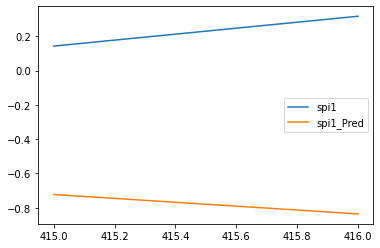

In [359]:
df_final[['spi1','spi1_Pred']].plot()